In [3]:
import os
import json
import re

def find_a_subset(index,feaure=14):
    
    '''To find the subset that will decrease the scaled norm with observerble difference'''
    
    file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
    feature_num =14
    with open(file_name) as f:
        data = json.load(f)
    A = []      #scaled norm of each feature
    for key, value in data.items():
            #print(key)
            numbers = [int(num) for num in re.findall(r'\d+', key)]
            if  len(numbers)==1:
                #print(numbers[0],numbers[1])
                A.append(value)

    for i in range(0,feature_num):
        min_value = 1
        for key, value in data.items():
            #print(key)
            numbers = [int(num) for num in re.findall(r'\d+', key)]
            B = [A[j] for j in numbers]           #find scaled norm of each 
            #print(B)
            #if  numbers[0]==i and value<(min_value-0.02) and value<(min(B)-0.01):
                #print(numbers[0],numbers[1])
               # min_value = value
                #print('feature_subset:',numbers,'scaled norm:',value)
            
 
find_a_subset(index=4)

feature_subset: [0, 1, 4] scaled norm: 0.22369123094381235
feature_subset: [0, 1, 4, 5] scaled norm: 0.19751499792657784
feature_subset: [0, 1, 4, 5, 6] scaled norm: 0.15982035523684407
feature_subset: [0, 1, 4, 5, 6, 13] scaled norm: 0.1277773517633017
feature_subset: [0, 1, 2, 4, 5, 6, 13] scaled norm: 0.10517230779113804
feature_subset: [0, 1, 2, 3, 4, 5, 6, 13] scaled norm: 0.07261369759984836
feature_subset: [0, 1, 2, 3, 4, 5, 6, 7, 13] scaled norm: 0.03031411453731946
feature_subset: [0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13] scaled norm: 0.007930285037877544
feature_subset: [1, 2] scaled norm: 0.6235072479964184
feature_subset: [1, 4] scaled norm: 0.5991922475224455
feature_subset: [1, 2, 4] scaled norm: 0.5757477932812611
feature_subset: [1, 2, 5] scaled norm: 0.5391594286015917
feature_subset: [1, 4, 5] scaled norm: 0.5156483803875944
feature_subset: [1, 2, 4, 5] scaled norm: 0.4878585912236457
feature_subset: [1, 4, 5, 6] scaled norm: 0.467528674841193
feature_subset: [1, 2, 4, 5, 6

In [15]:
import os
import json
import re

def find_global_min(index,subset_len,non_consider_feature=[]):
    file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
    subset_dic = {}
    with open(file_name) as f:
        data = json.load(f)
    A = []      #scaled norm of each feature
    for key, value in data.items():
            #print(key)
            numbers = [int(num) for num in re.findall(r'\d+', key)]
            if  len(numbers)==1:
                #print(numbers[0],numbers[1])
                A.append(value)
            
            B = [A[j] for j in numbers]             #find scaled norm of each
            flag = True
            for feature in non_consider_feature:
                if feature in numbers:
                    flag = False
                    break
    
            if len(numbers)==subset_len and flag:
            #print(key)
                subset_dic[key] = value
            else:
                continue
    
    sorted_subset_dic = dict(sorted(subset_dic.items(), key=lambda item: item[1]))
    
    keys_smallest_10_percent = list(sorted_subset_dic.items())[:int(len(sorted_subset_dic)*0.1)]
    print(A)
    for item in keys_smallest_10_percent:
        print(item)
    

find_global_min(4,4,non_consider_feature=[0])

[0.2468145252727361, 0.65535050098944, 0.6352204442367161, 0.5984065415938944, 0.7829290924047078, 0.5566535616067988, 0.7698492553313426, 0.5866572721796715, 0.6842123958105084, 0.47382146672506165, 0.709328830044025, 0.6075371382543499, 0.7861798523221922, 0.6424907273666441]
('[1 4 5 6]', 0.467528674841193)
('[ 1  4  5 13]', 0.48423489113927626)
('[1 2 4 5]', 0.4878585912236457)
('[1 3 4 5]', 0.49031333473237854)
('[1 2 5 6]', 0.4927634775142053)
('[1 3 5 6]', 0.4977240146245725)
('[ 1  5  6 13]', 0.49870099174803756)
('[ 8  9 10 11]', 0.5042422175116819)
('[ 2  3  5 13]', 0.5045871815524628)
('[1 4 5 7]', 0.5096889351892413)
('[1 5 6 7]', 0.5101663886465776)
('[ 2  5  7 13]', 0.510288954996144)
('[1 2 3 5]', 0.5127953032124497)
('[1 4 5 9]', 0.5144623162525708)
('[ 1  4  5 12]', 0.5152389913941848)
('[ 1  4  5 10]', 0.515464896357074)
('[1 4 5 8]', 0.5156316939366458)
('[ 1  4  5 11]', 0.515647478934462)
('[ 2  5  9 13]', 0.5160496897179867)
('[ 1  2  5 13]', 0.5176776450472015)
('

{'[1 2 5]': 0.4364814636209343,
 '[1 3 5]': 0.4303611112216422,
 '[1 4 5]': 0.4275213243733369,
 '[1 5 6]': 0.4357687743144901,
 '[1 5 7]': 0.4249211221342619,
 '[1 5 8]': 0.4287444790621025,
 '[1 5 9]': 0.4227058545547952,
 '[ 1  5 10]': 0.4299059699630054,
 '[ 1  5 11]': 0.43021842289235845,
 '[ 1  5 12]': 0.4270895980706706,
 '[ 1  5 13]': 0.4085123282780375,
 '[ 8  9 10]': 0.393062858434032,
 '[ 8  9 11]': 0.38482912403999436,
 '[ 9 10 11]': 0.3956034387744614}

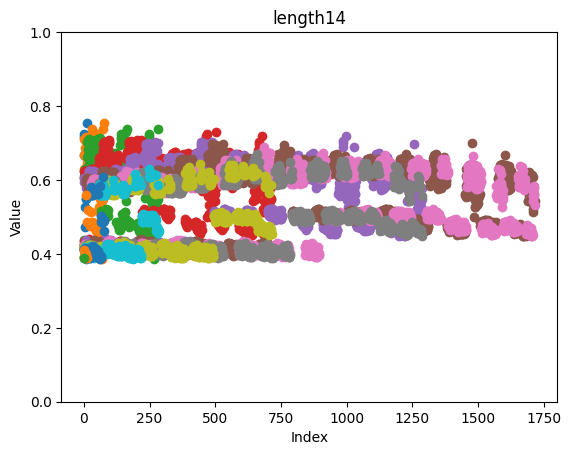

In [41]:
import os
import json
import numpy as np
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt
from trans import trans_json_to_dictinary, create_different_len_subset_list
threshold = 0.4
feature_num = 14
max_considered_subset_length = 6
index = 5
file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
dict = trans_json_to_dictinary(file_name)
data = create_different_len_subset_list(dict,feature_num=feature_num)
for i in range(feature_num):
    values = list(data[i].values())
    plt.ylim(0,1)
    plt.scatter(range(len(values)), values)
    plt.title(f'length{i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    #plt.show()

filtered_data = []
for i in range(max_considered_subset_length):
    filtered_data.append({key: value for key, value in data[i].items() if value <0.45})

(filtered_data[2])


In [10]:
plt.ylim

(0, 1)